#**Painting by K**

#**Finding the mean colors**

![](https://drive.google.com/uc?export=view&id=1yqn1R1_Z7Xr3-4vrWEFq4_vCF9mfWuWQ)

We are going to use our machine learning knowledge to quantize colors. Color quantization reduces the number of distinct colors used by an image. The resulting image has the same number of pixels; however, each pixel can only be colored using a finite palette. The resulting picture, could then be painted using only a few colors and (hopefully) you would still recognize the picture.

There are different algorithms to do this, but we will apply our K•means and clustering expertise to do exactly what we need. Not only will clustering work well for this problem, the cluster centers will give us the unique (best fitting) color palette to use.

We will be using K•means for color quantization to create a 'paint by numbers' picture. Although the final image won't be a labeled image, it will contain only a small amount of different colors. Your painter will still need fine motor skills.

#**Color Models**

As we learned previously, a color has red, green, blue (i.e. r,g,b) components (usually specified by the user from 0 to 255). We call this the RGB color model. In this case a color model is how one describes a color.

There are three popular color models:
* RGB is used for screen-based displays (additive model)
* CMYK (cyan, magenta, yellow, black) is used for printing (subtractive model)
* Lab (Light, a: green-red axis, b: blue-yellow axis) is based on how humans see color.


![](https://drive.google.com/uc?export=view&id=1FTXIvqzwVQwHUzyd80z8hHf1VNkvZ8Qt)

One of the issues of working with r,g,b colors is that it is not intuitive. It's hard to even imagine what a color might be if you are given it's r,g,b values. How orange (is it even orange?) is 229, 123, 0 anyway?

The HSV colormodel (shown below) attempts to fix this by separating the colors using hue (the color), saturation (intensity of color -- lack of gray), and value (light and darkness added to the color). Given that you know the hue, it's a bit easier to know how the other two values affect the color.

#**Color Space**
A color space is a specific implementation of a color model. It organizes the colors available to use. The set of colors that a color model can describe is the colorspace.

The RGB colorspace is usually shown as a cube using r,g,b as dimensions.

![](https://drive.google.com/uc?export=view&id=11fO-hZfpy_mtp_IW0KwXc-D_W7dPNoZ2)

In the HSV colorspace, the hue, saturation, and value parameters define the space.

![](https://drive.google.com/uc?export=view&id=1xjk2Rvl6FTVDbn3lEDPbwISGjUu4i5SE)

#**The Color of Math**

It is within a colorspace, that one can describe terms like 'distance' and 'similarity'. You can even mix colors mathematically (e.g. take averages). For example, in the image below, the last row of colors is the average of the two colors above it.

![](https://drive.google.com/uc?export=view&id=19AXuT6CwFjN-1S4VBALjnlq8qC2mZSA2)

#**Color Distance**

Within a colorspace, you can also define a distance metric to be used to determine how far two colors are apart. For example, the euclidean distance in RGB space is simply defined as:

$distance = \sqrt{(R_2-R_1)^2+(G_2-G_1)^2+(B_2-B_1)^2}$


#**Colorspace Problems**

However, not all colorspaces work well for doing 'math' operations on colors. The following image demonstrates this. Both the magenta color and the cyan/aqua are the same 'distance' from yellow.

![](https://drive.google.com/uc?export=view&id=1W_oiHHSuGw16ZuhC3DX2bx_gmKynl6pb)

Yet the cyan color appears to be much closer to yellow than magenta does. So when you compare the distances of colors in RGB, the same size 'gap' between colors may look very different. The big problem with using math with colors is that many colorspaces are not perceptually uniform.

###**Perceptually Uniform Colorspaces**

However, if a colorspace is perceptually uniform, then a change of length x in any direction of the color space would be perceived by a human as the same change.



To learn more about a few colorspaces that are perceptually uniform please read the [HSLuv](https://www.hsluv.org/) and the [CIE](https://medium.com/hipster-color-science/a-beginners-guide-to-colorimetry-401f1830b65a) colorspaces. The HSLuv colorspace is used to design user-friendly color- pallets. Both the CIELab and CIELuv colorspaces are designed to match what our eyes see.

#**ColorMaps**

Just to refresh our memory from a distant lesson, a color map allow you to map a numeric value to a color. You can store your 'image' as a simple matrix of numbers rather than a 'color' specification for each point. Hence, using a colormap can help to decrease the amount of memory/storage. It can act like a look up table.

Colormaps also are used to specify the available colors within a colorspace. An artist (i.e. software engineer, info490 student) can specifify how index numbers will map to specific colors. As we have seen matplotlib offers many available colormaps to use. And which one is used could have implications. Be sure to [read](https://www.eecs.harvard.edu/~kgajos/papers/2011/borkin11-infoviz.pdf) how the once default 'jet' colormap lead to more diagnostic errors.

#**Lesson Assignment**

So all this talk about math and colors must be leading to something good. We will read in (using numpy) some image data and encapsulate it withtin a class and then perform KMeans on the image data using K number of colors.

#**Step 1: RCImage**
Create a class named RCImage whose constructor accepts a filename.

The class will have the following attributes as 'private' attributes (using Python conventions to mark them as 'private'):
* image_data
* width
* height

### Decorating width and height as read-only
* Make both width and height attributes be read-only properties
* Add a method named get_pixels that returns the image_data

###Reading Image Data
**\__init__**

The constructor will use the numpy's np.load function to read into a 3-dimensional matrix(height x width x 3) which is contained in the filename parameter:

```image_data = np.load(filename)```

If you save an numpy array (using np.save) to a file, you can read in that data using np.load. After you read in the image data, set both the height and the width properties.

###Pretty Printing
**\__repr__**

Add the \__repr__ method so printing looks like the following:

```w:<the_width> h:<the_height>```
<br><br>

#####**Take a look at the following code and understand what is happening. Most of the code for this step is already done for you.**

```
import matplotlib.pyplot as plt
import numpy as np

class RCImage(object):
    def __init__(self, filename=None, img_data=None):
      self._image_data = None
      if (img_data is not None):
        self._image_data = img_data
      else:
        self._image_data = np.load(filename)


      self._width = np.shape(self._image_data)[1]
      self._height = np.shape(self._image_data)[0]
  

    def __repr__(self):
      return "w:{} h:{}".format(self._width, self._height)

    # allow reading
    @property
    def width(self):
      return self._width

    # allow reading
    @property
    def height(self):
      return self._height

    def get_pixels(self):
      return self._image_data

    def display(self, size = 6, frame = False):
      fig, ax = plt.subplots(figsize=(size,size))
      ax.imshow(self.get_pixels())
      return fig
```


#**Step 2: Remove the frame**

When you display an image, let's remove all the axis markers and the frame around the picture. Add a named parameter frame whose default value is False. If frame is False, remove the frame. Add this code to the display() function above.

```
# how to remove the frame
axes.xaxis.set_visible(False)
axes.yaxis.set_visible(False)
axes.set_frame_on(False)
```

In [3]:
import matplotlib.pyplot as plt
import numpy as np


class RCImage(object):
    def __init__(self, filename=None, img_data=None):
        self._image_data = None
        if (img_data is not None):
            self._image_data = img_data
        else:
            self._image_data = np.load(filename)

        self._width = np.shape(self._image_data)[1]
        self._height = np.shape(self._image_data)[0]

    def __repr__(self):
        return "w:{} h:{}".format(self._width, self._height)

    # allow reading
    @property
    def width(self):
        return self._width

    # allow reading
    @property
    def height(self):
        return self._height

    def get_pixels(self):
        return self._image_data

    def display(self, size=6, frame=False):
         fig, axes = plt.subplots(figsize=(size, size))
         axes.imshow(self.get_pixels())
         if not frame:
            # how to remove the frame
            axes.xaxis.set_visible(False)
            axes.yaxis.set_visible(False)
            axes.set_frame_on(False)
         return fig


#**Step 3: Test it**
You should see the image without any borders

```
def test_image():
    path = ('cat400Green.png')
    
    im = plt.imread(path)
    my_image = RCImage(img_data=im)
    fig = my_image.display()

test_image()
```

![](https://drive.google.com/uc?export=view&id=1PTN1tI_IsyJ_SuoraaOHAUKuAG1wFDno)

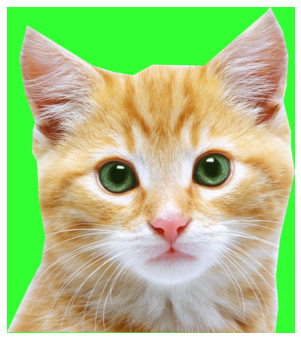

In [4]:
def test_image():
    path = ('cat400Green.png')
    
    im = plt.imread(path)
    my_image = RCImage(img_data=im)
    fig = my_image.display()

test_image()

In [5]:
path = ('cat400Green.png')

im = plt.imread(path)
my_image = RCImage(img_data=im)
my_image.get_pixels().shape

(454, 400, 3)

In [6]:
def display(pic, size=6, frame=False):
			fig, axes = plt.subplots(figsize=(size, size))
			axes.imshow(pic)
			if not frame:
				# how to remove the frame
				axes.xaxis.set_visible(False)
				axes.yaxis.set_visible(False)
				axes.set_frame_on(False)
			return fig

#**Step 4: ImageCluster Create a class named ImageCluster.**

* The constructor for ImageCluster takes an RCImage as it's only parameter
* Add a method named paint_by_number that has a parameter, count, that is the number of colors the painting will have. It has a default value of 8.
* paint_by_number performs KMeans on the image data (specifically the pixels)
* paint_by_number does not return anything, but the class should use an attribute to hold onto the model and labels (use km and labels respectively).

**Good enough Painting**

For our paint-by-k application, using euclidean distance on r,g,b values will not be completely accurate in terms of finding and blending colors. The RGB colorspace (as well as HSV) is not a perceptual uniform colorspace. But the good news is the end result (for our purposes) can still be pretty good. We'll let you be the judge.

In [7]:
from sklearn.cluster import KMeans
import numpy as np



class ImageCluster(object):
    def __init__(self, rc=None) -> None:
        super().__init__()
        self._rc = rc
        self._pixels = rc.get_pixels()
        self._color_scale = rc.get_pixels().shape[2]

    def flatten(self, data):
        return data.reshape(-1, self._color_scale)
    
    def matrixize(self, data):
        return data.reshape(self._rc.height, self._rc.width, self._color_scale)
    
    def paint_by_number(self, count=8):
        km = KMeans(n_clusters=count,   # how many clusters
                    max_iter=300,   # iterate 300 times, for a 'single run'
                    n_init=10,     # run it 100 times, picking the best one
                    # pick random centers (provide your own, 'k-means++')
                    init='random',
                    random_state=None,  # pick None to be different each time
                    tol=0.0001)     # when to declare convergence between two consecutive iterations

        # build the model
        km.fit(self.flatten(self._pixels))

        centers = km.cluster_centers_

        # pass the same data through the model, predict will assign the point to a label (cluster number)
        labels = km.predict(self.flatten(self._pixels))

        self.km = km
        self.centers = centers
        self.labels = labels

        return km, labels
    
    def build_painting(self):

        pic = np.zeros([self._rc.height * self._rc.width, self._color_scale])
        
        for index, pixel in enumerate(self.flatten(self._pixels)):
            pic[index] = self.centers[self.labels[index]]

        return self.matrixize(pic)
    

ic = ImageCluster(my_image)
flat = ic.flatten(ic._pixels)
matrix = ic.matrixize(flat)
ic.paint_by_number()
ic.build_painting()

array([[[0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        ...,
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005]],

       [[0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        ...,
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005]],

       [[0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        ...,
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005],
        [0.19876245, 0.99903709, 0.19838005]],

       ...,

       [[0.78418648, 0.7399919 , 0.7165451 ],
        [0.90042877, 0.87782037, 0.8616401 ],
        [0.90042877, 0

#**Step 5: Test your class**

Once that is done, the following should work (it should run in under 7 seconds)

In [8]:
def test_paint():
    path = 'cat400Green.png'
    im = plt.imread(path)
    my_image = RCImage(img_data=im)
    ic = ImageCluster(my_image)
    ic.paint_by_number(8)
    print(len(ic.km.cluster_centers_) == 8)
    print(ic.km.cluster_centers_)
    print(np.array(ic.labels).mean())


test_paint()


True
[[0.71322113 0.61745834 0.53346914]
 [0.6406645  0.46176335 0.2924772 ]
 [0.7897791  0.746078   0.72210014]
 [0.90244484 0.87960535 0.8624612 ]
 [0.8089107  0.6374937  0.38243765]
 [0.19873586 0.99903965 0.19835314]
 [0.27950284 0.2299453  0.10691243]
 [0.88465977 0.76914656 0.5778198 ]]
3.4855726872246695


#**Step 6: Let's paint Oh My!**

Here's where the paint hits the canvas. Now that the clustering is done, you have a finite set of paints to use. Your job is to build a new painting (same number of pixels) but each pixel is colored based on the result of running KMeans.
* create a method named build_painting in ImageCluster class that just returns a new matrix of pixels (hint use np.zeros).
* build_painting should only contain a unique set of colors (based on how paint_by_number was called).

#**Step 7: Test it!**

Once that is done, you can pipeline the entire process:

In [ ]:
def paint_pipeline(path=None, count=6, figsize=12):

    if path is None:
        path = 'cat400Green.png'

    im = plt.imread(path)
    my_image = RCImage(img_data=im)
    ic = ImageCluster(my_image)

    # build a painting using count colors
    ic.paint_by_number(count)

    # display the painting
    k_image = ic.build_painting()
    painting = RCImage(img_data=k_image)
    painting.display(size=figsize)

    return ic


from PIL import Image
import requests
from io import BytesIO


# url = r'94664666_p1.jpg'

# response = requests.get(url)
# img = Image.open(BytesIO(response.content))
# img.save(r'test.png')

# paint_pipeline(path="test.png", count=5, figsize=12)


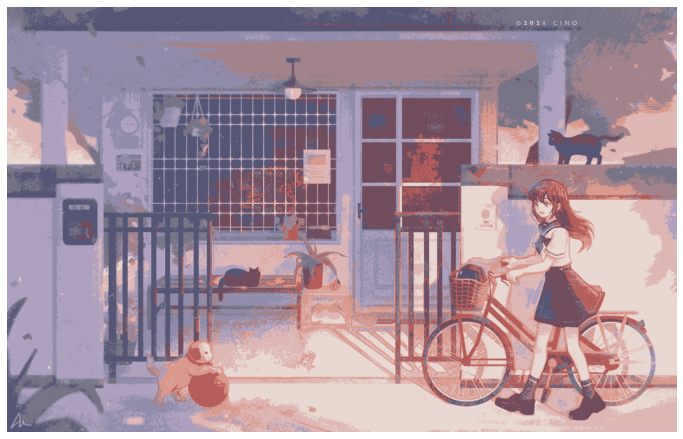

In [19]:
paint_pipeline(path="test1.png", count=10, figsize=12)

![](https://drive.google.com/uc?export=view&id=1a5WC-ULHuwvkvRmwwdIKOIw2s3UFGnki)

#**Bonus Learning**

no points, but much learning will happen
* For faster running times, try setting max_iter to 200 and n_init to 10. How does it affect the quality of the painting?
* Display a color bar of the paints used by your painting
* Replace the "Green Screen" color (50,255,50) with a more suitable one
* Experiment with a uniform color space (instead of r,g,b) to see if the results of your painting are better (the python package cv2 has color conversion routines -- but there many available). These libraries will not be available on the tester -- but you can use them to upload to the gallery
* What happens to your painting if you run it through the RGBImageKernel
* How might you label your painting to turn it into an actual paint-by-numbers project


![](https://drive.google.com/uc?export=view&id=1is-S9OHB0LAX-Wmtk_lfPImrs3UU7ftL)

Any comments on this are welcome to post on Piazza, it would be a fun learning!!

**Steps to submit your work:**


1.   Download the lesson notebook from Moodle.
2.   Upload any supporting files using file upload option within Google Colab.
3.   Complete the exercises and/or assignments
4.   Download as .ipynb
5.   Name the file as "lastname_firstname_WeekNumber.ipynb"
6.   After following the above steps, submit the final file in Moodle





<h1><center>The End!</center></h1>